# Models

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

## Prepare train test split datasets

In [36]:
df = pd.read_csv('../../data/final_features_df.csv')
df.head()

,Unnamed: 0,Age,Income,faves_pca0,faves_pca1,unfaves_pca0,unfaves_pca1,accessories,alcohol,animamted,...,Drama.2,Entertainment (Variety Shows),Factual,Learning,Music,News,Religion &amp; Ethics,Sport.1,Weather,Rating_bin
0,0,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,1,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,3,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,4,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
df_0 = df.fillna(0)

In [38]:
# Y = df_0.pop('Rating_bin')
# X = df_0

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

df = df_0.sample(frac = 1)
train_frac = 0.8
test_frac = 0.1

X_train = df[[c for c in df.columns if c != 'Rating_bin']].iloc[:int(len(df) * train_frac)].values
y_train = df.Rating_bin.iloc[:int(len(df) * train_frac)].values

X_test = df[[c for c in df.columns if c != 'Rating_bin']].iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values
y_test = df.Rating_bin.iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values

X_valid = df[[c for c in df.columns if c != 'Rating_bin']].iloc[int(len(df) * (train_frac+test_frac)):].values
y_valid = df.Rating_bin.iloc[int(len(df) * (train_frac+test_frac)):].values

## Baseline Models

### Plug-in Models
#### Simple: LDA

In [43]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [44]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3143
           1       0.42      0.16      0.23       469

    accuracy                           0.86      3612
   macro avg       0.65      0.56      0.58      3612
weighted avg       0.82      0.86      0.83      3612



In [45]:
confusion_matrix(y_test, y_pred)

array([[3041,  102],
       [ 396,   73]])

#### Complex: Naive Bayes

In [46]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.74      0.83      3143
           1       0.27      0.64      0.38       469

    accuracy                           0.73      3612
   macro avg       0.60      0.69      0.60      3612
weighted avg       0.85      0.73      0.77      3612



array([[2327,  816],
       [ 170,  299]])

In [47]:
prior_probabilities = df.groupby('Rating_bin').size().div(len(df))
prior_probabilities

prior_0 = prior_probabilities.iloc[0]
prior_1 = prior_probabilities.iloc[1]


clf = GaussianNB(priors = [prior_0, prior_1])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.74      0.83      3143
           1       0.27      0.64      0.38       469

    accuracy                           0.73      3612
   macro avg       0.60      0.69      0.60      3612
weighted avg       0.85      0.73      0.77      3612



array([[2327,  816],
       [ 170,  299]])

## Risk Minimization
### Simple: Decision Tree

In [48]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3143
           1       0.37      0.38      0.38       469

    accuracy                           0.84      3612
   macro avg       0.64      0.64      0.64      3612
weighted avg       0.84      0.84      0.84      3612



array([[2837,  306],
       [ 289,  180]])

#### Complex: Neural Networks

In [49]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3143
           1       0.00      0.00      0.00       469

    accuracy                           0.87      3612
   macro avg       0.44      0.50      0.47      3612
weighted avg       0.76      0.87      0.81      3612



/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

array([[3143,    0],
       [ 469,    0]])

### Hyperparameters search

In [50]:
def hyperparameter_tunning(clf, parameters):
    clf = clf

    grid_search = GridSearchCV(clf, parameters)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    return pd.DataFrame(grid_search.cv_results_)

#### LDA

In [51]:
parameters = {
    'solver': ('svd', 'lsqr', 'eigen'),
    'priors': [None, [0.5, 0.5]]
}


In [52]:
results = hyperparameter_tunning(LinearDiscriminantAnalysis(), parameters)
results

/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 605, in fit
    self._solve_eigen(
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3143
           1       0.42      0.16      0.23       469

    accuracy                           0.86      3612
   macro avg       0.65      0.56      0.58      3612
weighted avg       0.82      0.86      0.83      3612

[[3041  102]
 [ 396   73]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.117586,0.160356,0.008674,0.006550,None,svd,"{'priors': None, 'solver': 'svd'}",0.857612,0.858280,0.852570,0.865202,0.855684,0.857870,0.004168,1
1,1.248198,0.131378,0.003758,0.000779,None,lsqr,"{'priors': None, 'solver': 'lsqr'}",0.857612,0.858280,0.852570,0.865202,0.855684,0.857870,0.004168,1
2,1.304190,0.175265,0.000000,0.000000,None,eigen,"{'priors': None, 'solver': 'eigen'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,2.203180,0.112826,0.005653,0.002984,"[0.5, 0.5]",svd,"{'priors': [0.5, 0.5], 'solver': 'svd'}",0.730796,0.729538,0.715349,0.702890,0.745804,0.724875,0.014621,3
4,1.179982,0.082661,0.003307,0.000047,"[0.5, 0.5]",lsqr,"{'priors': [0.5, 0.5], 'solver': 'lsqr'}",0.656920,0.665513,0.678837,0.644748,0.680048,0.665213,0.013367,4
5,1.153694,0.080688,0.000000,0.000000,"[0.5, 0.5]",eigen,"{'priors': [0.5, 0.5], 'solver': 'eigen'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


#### Naive Bayes

In [53]:
parameters = {
    'priors': [None, [0.5, 0.5]],
    'var_smoothing': (1e-9, 0.0001, 0.01, 0.1)
}

In [54]:
results = hyperparameter_tunning(GaussianNB(), parameters)
results

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3143
           1       0.00      0.00      0.00       469

    accuracy                           0.87      3612
   macro avg       0.44      0.50      0.47      3612
weighted avg       0.76      0.87      0.81      3612

[[3143    0]
 [ 469    0]]


/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.192986,0.004488,0.043094,0.009061,None,0.0,"{'priors': None, 'var_smoothing': 1e-09}",0.715917,0.717944,0.703582,0.711542,0.722443,0.714286,0.006398,4
1,0.191698,0.001637,0.037768,0.000425,None,0.0001,"{'priors': None, 'var_smoothing': 0.0001}",0.865398,0.865548,0.865375,0.865375,0.865375,0.865414,0.000067,1
2,0.191989,0.000982,0.038166,0.000821,None,0.01,"{'priors': None, 'var_smoothing': 0.01}",0.865398,0.865548,0.865375,0.865375,0.865375,0.865414,0.000067,1
3,0.198343,0.015096,0.038918,0.001756,None,0.1,"{'priors': None, 'var_smoothing': 0.1}",0.865398,0.865548,0.865375,0.865375,0.865375,0.865414,0.000067,1
4,0.190752,0.001276,0.038078,0.000691,"[0.5, 0.5]",0.0,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-09}",0.527509,0.502163,0.472746,0.531580,0.484686,0.503737,0.023092,5
5,0.196948,0.008659,0.038180,0.000665,"[0.5, 0.5]",0.0001,"{'priors': [0.5, 0.5], 'var_smoothing': 0.0001}",0.487543,0.450424,0.479668,0.489185,0.445925,0.470549,0.018604,8
6,0.192379,0.001847,0.039698,0.002248,"[0.5, 0.5]",0.01,"{'priors': [0.5, 0.5], 'var_smoothing': 0.01}",0.488754,0.453712,0.479841,0.490050,0.446790,0.471829,0.018099,6
7,0.194020,0.005648,0.038302,0.000462,"[0.5, 0.5]",0.1,"{'priors': [0.5, 0.5], 'var_smoothing': 0.1}",0.488754,0.453366,0.480014,0.489877,0.446617,0.471726,0.018197,7


#### Decision Trees

In [55]:
parameters = {
    'criterion': ('gini', 'entropy', 'log_loss'),
    'splitter': ('best', 'random')
}

In [56]:
results = hyperparameter_tunning(DecisionTreeClassifier(), parameters)
results

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3143
           1       0.34      0.35      0.34       469

    accuracy                           0.83      3612
   macro avg       0.62      0.62      0.62      3612
weighted avg       0.83      0.83      0.83      3612

[[2823  320]
 [ 306  163]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.675276,0.268212,0.008796,0.000236,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.842215,0.842187,0.843052,0.840111,0.845821,0.842677,0.001847,4
1,1.891692,0.173303,0.011278,0.002286,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.842907,0.838553,0.836131,0.840976,0.849455,0.841604,0.004539,5
2,1.241333,0.039843,0.008626,0.000213,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.842215,0.842360,0.843052,0.840111,0.845821,0.842712,0.001840,2
3,1.374743,0.140427,0.009133,0.000572,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.845848,0.843572,0.838553,0.837688,0.841322,0.841397,0.003046,6
4,1.224201,0.083472,0.009804,0.002643,log_loss,best,"{'criterion': 'log_loss', 'splitter': 'best'}",0.842215,0.842360,0.843052,0.840111,0.845821,0.842712,0.001840,2
5,1.309011,0.112801,0.008816,0.000345,log_loss,random,"{'criterion': 'log_loss', 'splitter': 'random'}",0.843426,0.841668,0.842014,0.837688,0.848936,0.842746,0.003635,1


#### Neural Network

In [21]:
parameters = {
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    #'solver': ('lbfgs', 'sgd', 'adam'),
    'alpha': (0.0001, 0.001, 0.1)
}

In [22]:
results = hyperparameter_tunning(MLPClassifier(), parameters)
results

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     10267
           1       0.00      0.00      0.00      1653

    accuracy                           0.86     11920
   macro avg       0.43      0.50      0.46     11920
weighted avg       0.74      0.86      0.80     11920

[[10267     0]
 [ 1653     0]]


/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.094479,2.016994,0.036526,0.001343,identity,0.0001,"{'activation': 'identity', 'alpha': 0.0001}",0.521281,0.816116,0.863017,0.760331,0.869628,0.766074,0.128516,12
1,11.894125,3.783246,0.036052,0.000832,identity,0.001,"{'activation': 'identity', 'alpha': 0.001}",0.868388,0.868388,0.868182,0.866942,0.820661,0.858512,0.018933,7
2,6.981953,0.962796,0.034455,0.000502,identity,0.1,"{'activation': 'identity', 'alpha': 0.1}",0.868388,0.868388,0.868182,0.797727,0.870248,0.854587,0.028440,8
3,8.594739,3.175214,0.046728,0.007395,logistic,0.0001,"{'activation': 'logistic', 'alpha': 0.0001}",0.868388,0.868388,0.868182,0.868182,0.868182,0.868264,0.000101,1
4,9.273893,2.862996,0.038771,0.001369,logistic,0.001,"{'activation': 'logistic', 'alpha': 0.001}",0.868388,0.868388,0.868182,0.868182,0.868182,0.868264,0.000101,1
5,5.966920,3.892068,0.038889,0.001755,logistic,0.1,"{'activation': 'logistic', 'alpha': 0.1}",0.868388,0.868388,0.868182,0.868182,0.868182,0.868264,0.000101,1
6,5.587911,1.389407,0.038379,0.001475,tanh,0.0001,"{'activation': 'tanh', 'alpha': 0.0001}",0.868388,0.868388,0.868182,0.868182,0.868182,0.868264,0.000101,1
7,6.467540,0.836967,0.037696,0.000692,tanh,0.001,"{'activation': 'tanh', 'alpha': 0.001}",0.868388,0.868388,0.868182,0.868182,0.868182,0.868264,0.000101,1
8,5.487893,1.285797,0.041764,0.004483,tanh,0.1,"{'activation': 'tanh', 'alpha': 0.1}",0.868388,0.868388,0.868182,0.868182,0.868182,0.868264,0.000101,1
9,9.421624,1.249159,0.032581,0.000788,relu,0.0001,"{'activation': 'relu', 'alpha': 0.0001}",0.868388,0.868388,0.867975,0.359298,0.870248,0.766860,0.203783,11


# Probability Calibration

/var/folders/12/tpf_lyk108743n_1zhjxp3dw0000gn/T/ipykernel_54390/4244458037.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_probs_train)
/var/folders/12/tpf_lyk108743n_1zhjxp3dw0000gn/T/ipykernel_54390/4244458037.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_probs_test)


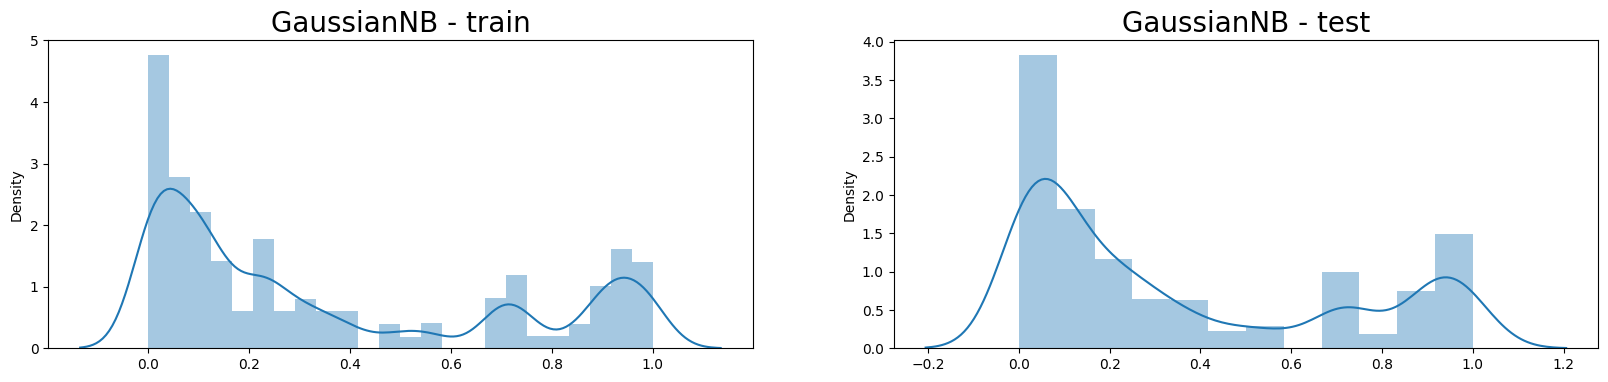

In [58]:
# as seen in class
model_to_probs = {}
model_str_to_trained_model = {}

clf = GaussianNB()
clf.fit(X_train, y_train)

pred_probs_train = clf.predict_proba(X_train)[:,1]
pred_probs_test = clf.predict_proba(X_test)[:,1]
pred_probs_valid = clf.predict_proba(X_valid)[:,1]

model_to_probs['GaussianNB'] = {'train': pred_probs_train, 'test': pred_probs_test, 'valid': pred_probs_valid}

plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.distplot(pred_probs_train)
plt.title(f"GaussianNB - train", fontsize=20)

plt.subplot(1,2,2)
sns.distplot(pred_probs_test)
plt.title(f"GaussianNB - test", fontsize=20)

model_str_to_trained_model['GaussianNB'] = clf

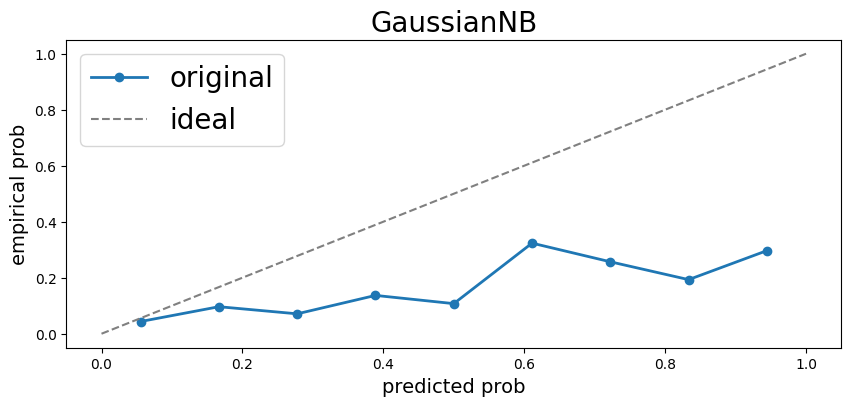

In [59]:
for model_str, pred_prob_dict in model_to_probs.items():
    pred_probs = pred_prob_dict['test']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(y_test[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'ideal'], fontsize=20)

Brier score of GaussianNB 0.10397969427900866


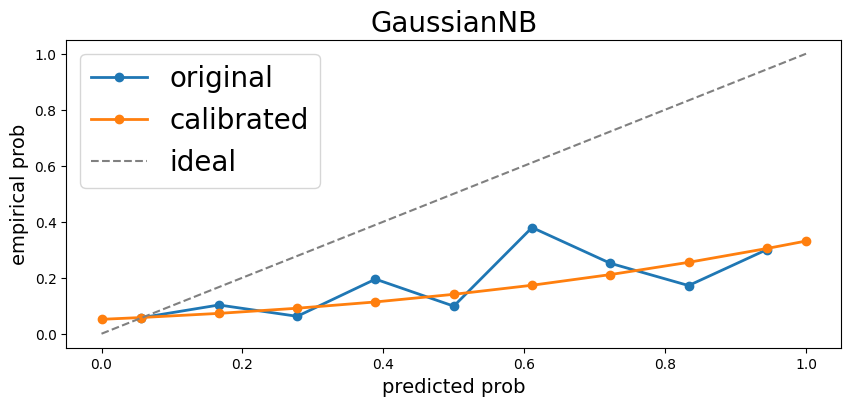

In [60]:
model_str_to_calibrator = {}

for model_str, pred_prob_dict in model_to_probs.items():
    #train calibration model
    lr_model = LogisticRegression()
    lr_model.fit(pred_prob_dict['test'].reshape(-1,1), y_test)
    
    pred_probs = pred_prob_dict['valid']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(y_valid[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    calibrated_probs = lr_model.predict_proba(np.array([0.0]+pred_probs_midpoints+[1.0]).reshape(-1,1))[:,1]
    print('Brier score of '+model_str, brier_score_loss(y_test, lr_model.predict_proba(pred_prob_dict['test'].reshape(-1,1))[:,1]))
    
    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0.0]+pred_probs_midpoints+[1.0], calibrated_probs, linewidth=2, marker='o')
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'calibrated', 'ideal'], fontsize=20)
    
    model_str_to_calibrator[model_str] = lr_model

In [70]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

c10 = 1
c01 = 1
p1 = np.mean(y_train)
p0 = 1 - np.mean(y_train)
Lambda = np.exp(gaussian.predict_log_proba(X_valid)[1])/np.exp(gaussian.predict_log_proba(X_valid)[0])
eta = (c10*p0)/(c01*p1)
y_pred = (Lambda>eta)*1

In [68]:
gaussian.predict_proba(X_valid)

array([[5.93693499e-01, 4.06306501e-01],
       [9.99632906e-01, 3.67093917e-04],
       [9.77553820e-01, 2.24461798e-02],
       ...,
       [1.67181725e-05, 9.99983282e-01],
       [7.56984367e-01, 2.43015633e-01],
       [9.38441848e-01, 6.15581517e-02]])

In [71]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [3612, 2]